Data documentation: https://tidyr.tidyverse.org/reference/who.html

Directions: Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [81]:
df1.head()

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df1 = df1.drop(columns=['iso2', 'iso3'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

Question 1. We need to know what's included in this data.

1.How many countries are present?

2.What's the timespan of the data?

3.Does each country have a row for every year present?

4.Which countries are missing years?

5.How many rows have at least 1 non-null values across the columns 3-57?

In [83]:
#1.How many countries are present?
tot_countries=df1['country'].unique()
country_count=len(tot_countries)
print(country_count)

219


In [84]:
#2.What's the timespan of the data?
df1['year']

0       1980
1       1981
2       1982
3       1983
4       1984
        ... 
7235    2009
7236    2010
7237    2011
7238    2012
7239    2013
Name: year, Length: 7240, dtype: int64

In [85]:
min_year=df1['year'].min()
min_year

1980

In [86]:
max_year=df1['year'].max()
max_year

2013

In [39]:
#3.Does each country have a row for every year present?
unq_years = df['year'].unique()
g=df.groupby('country')
country_missingyears=[]
for i,j in g:
    year_group=j['year'].unique()
    if len(year_group)!= len(unq_years):
        country_missingyears.append(i)
        print("Country:" +i+ " does not have a row for every year present.")
    else:
        print("Country:" +i+ " has a row for every year present.")

Country:Afghanistan has a row for every year present.
Country:Albania has a row for every year present.
Country:Algeria has a row for every year present.
Country:American Samoa has a row for every year present.
Country:Andorra has a row for every year present.
Country:Angola has a row for every year present.
Country:Anguilla has a row for every year present.
Country:Antigua and Barbuda has a row for every year present.
Country:Argentina has a row for every year present.
Country:Armenia has a row for every year present.
Country:Aruba has a row for every year present.
Country:Australia has a row for every year present.
Country:Austria has a row for every year present.
Country:Azerbaijan has a row for every year present.
Country:Bahamas has a row for every year present.
Country:Bahrain has a row for every year present.
Country:Bangladesh has a row for every year present.
Country:Barbados has a row for every year present.
Country:Belarus has a row for every year present.
Country:Belgium ha

In [40]:
#4.Which countries are missing years?
print(country_missingyears)

['Bonaire, Saint Eustatius and Saba', 'Curacao', 'Montenegro', 'Netherlands Antilles', 'Serbia', 'Serbia & Montenegro', 'Sint Maarten (Dutch part)', 'South Sudan', 'Timor-Leste']


In [87]:
#5.How many rows have at least 1 non-null values across the columns 3-57?
df_select=df1.iloc[:,3:57]
notnull_val=df_select.notnull()
nonnull_val=notnull_val.any(axis=1)
n=nonnull_val.sum()
print(" Count of rows having at least 1 non-null values across the columns 3-57 is:",n)

 Count of rows having at least 1 non-null values across the columns 3-57 is: 3483


Question 2: Wide data isn't usually helpful.

Convert this to a long format with the following columns:

1. country
2. year
3. diagnosis method: mapping should be:
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
4. gender: male or female.
5. age: lower_age - higher_age, e.g., 0-14
6. number of cases

Note: You can use replace (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [88]:
df1.head()

,country,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
mapping = {'newsp':'Pulmonary Smear (+)' ,'newsn':'Pulmonary Smear (-)' ,'newep':'Extrapulmonary' ,'newrel':'Relapse'}

# Create age ranges
age_ranges = ['0-14','35-54','55-64']

# Melt the data frame to long format
df = df1.melt(id_vars=['country', 'year'], value_vars=['new_sp_m014', 'new_sp_f014', 'new_sn_m014', 'new_sn_f014', 'new_ep_m014', 'new_ep_f014', 'newrel_m014', 'newrel_f014'])
df


,country,year,variable,value
0,Afghanistan,1980,new_sp_m014,NaN
1,Afghanistan,1981,new_sp_m014,NaN
2,Afghanistan,1982,new_sp_m014,NaN
3,Afghanistan,1983,new_sp_m014,NaN
4,Afghanistan,1984,new_sp_m014,NaN
...,...,...,...,...
57915,Zimbabwe,2009,newrel_f014,NaN
57916,Zimbabwe,2010,newrel_f014,NaN
57917,Zimbabwe,2011,newrel_f014,NaN
57918,Zimbabwe,2012,newrel_f014,NaN


In [122]:
# Split the variable column into diagnosis method and gender
df[['diagnosis_method', 'gender']] = df['variable'].str.extract(r'(.*)_(.*)', expand=True)
df

,country,year,variable,value,diagnosis_method,gender
0,Afghanistan,1980,new_sp_m014,NaN,new_sp,m014
1,Afghanistan,1981,new_sp_m014,NaN,new_sp,m014
2,Afghanistan,1982,new_sp_m014,NaN,new_sp,m014
3,Afghanistan,1983,new_sp_m014,NaN,new_sp,m014
4,Afghanistan,1984,new_sp_m014,NaN,new_sp,m014
...,...,...,...,...,...,...
57915,Zimbabwe,2009,newrel_f014,NaN,newrel,f014
57916,Zimbabwe,2010,newrel_f014,NaN,newrel,f014
57917,Zimbabwe,2011,newrel_f014,NaN,newrel,f014
57918,Zimbabwe,2012,newrel_f014,NaN,newrel,f014


In [123]:
df = df.drop(columns=['variable'])
df

,country,year,value,diagnosis_method,gender
0,Afghanistan,1980,NaN,new_sp,m014
1,Afghanistan,1981,NaN,new_sp,m014
2,Afghanistan,1982,NaN,new_sp,m014
3,Afghanistan,1983,NaN,new_sp,m014
4,Afghanistan,1984,NaN,new_sp,m014
...,...,...,...,...,...
57915,Zimbabwe,2009,NaN,newrel,f014
57916,Zimbabwe,2010,NaN,newrel,f014
57917,Zimbabwe,2011,NaN,newrel,f014
57918,Zimbabwe,2012,NaN,newrel,f014


In [124]:
# Rename the value column to number_of_cases
df.rename(columns={'value':'number_of_cases'}, inplace=True)
df

,country,year,number_of_cases,diagnosis_method,gender
0,Afghanistan,1980,NaN,new_sp,m014
1,Afghanistan,1981,NaN,new_sp,m014
2,Afghanistan,1982,NaN,new_sp,m014
3,Afghanistan,1983,NaN,new_sp,m014
4,Afghanistan,1984,NaN,new_sp,m014
...,...,...,...,...,...
57915,Zimbabwe,2009,NaN,newrel,f014
57916,Zimbabwe,2010,NaN,newrel,f014
57917,Zimbabwe,2011,NaN,newrel,f014
57918,Zimbabwe,2012,NaN,newrel,f014


In [125]:
# Reorder columns to match the desired format

df = df[['country', 'year', 'diagnosis_method', 'gender', 'number_of_cases']]
df

,country,year,diagnosis_method,gender,number_of_cases
0,Afghanistan,1980,new_sp,m014,NaN
1,Afghanistan,1981,new_sp,m014,NaN
2,Afghanistan,1982,new_sp,m014,NaN
3,Afghanistan,1983,new_sp,m014,NaN
4,Afghanistan,1984,new_sp,m014,NaN
...,...,...,...,...,...
57915,Zimbabwe,2009,newrel,f014,NaN
57916,Zimbabwe,2010,newrel,f014,NaN
57917,Zimbabwe,2011,newrel,f014,NaN
57918,Zimbabwe,2012,newrel,f014,NaN


Question 3: Create a graph that shows when countries started to report TB cases.

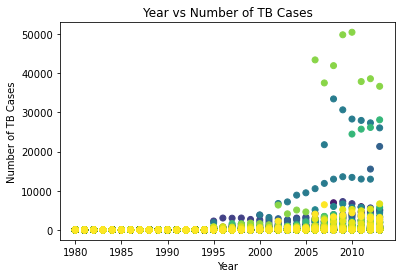

In [131]:
df_group = df.groupby(['year', 'country']).sum().reset_index()
plt.scatter(df_group['year'],df_group['number_of_cases'], c=df_group['country'].astype('category').cat.codes)
plt.title('Year vs Number of TB Cases')
plt.xlabel('Year')
plt.ylabel('Number of TB Cases')
plt.show()